<a href="https://colab.research.google.com/github/MigguuelT/Miguel-Torikachvili/blob/main/Limites_de_controle_estatistico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limites de Controle Estátistico

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [20]:
def gerar_dados_aleatorios(n, media=10, desvio_padrao=1):
    """
    Gera dados aleatórios com distribuição normal.

    Args:
        n: Quantidade de dados a serem gerados
        media: Média dos dados
        desvio_padrao: Desvio padrão dos dados (amplitude)

    Returns:
        Lista com os dados gerados
    """
    return np.random.normal(media, desvio_padrao, n)

In [21]:
def calcular_limites_controle(dados, sigma=3):
    """
    Calcula os limites de controle.

    Args:
        dados: Lista com os dados
        sigma: Número de desvios padrão para os limites (padrão: 3)

    Returns:
        media, desvio_padrao, LSC, LIC
    """
    media = np.mean(dados)
    desvio_padrao = np.std(dados)

    LSC = media + sigma * desvio_padrao  # Limite Superior de Controle
    LIC = media - sigma * desvio_padrao  # Limite Inferior de Controle

    return media, desvio_padrao, LSC, LIC

In [22]:
def plotar_grafico_controle(dados, media, LSC, LIC):
    """
    Plota o gráfico de controle.

    Args:
        dados: Lista com os dados
        media: Limite central (média)
        LSC: Limite Superior de Controle
        LIC: Limite Inferior de Controle
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotando os pontos
    indices = range(1, len(dados) + 1)
    ax.plot(indices, dados, 'bo-', markersize=4, label='Dados')

    # Plotando as linhas de limite
    ax.axhline(y=media, color='g', linestyle='-', label=f'Limite Central (μ = {media:.2f})')
    ax.axhline(y=LSC, color='r', linestyle='--', label=f'LSC (μ + 3σ = {LSC:.2f})')
    ax.axhline(y=LIC, color='r', linestyle='--', label=f'LIC (μ - 3σ = {LIC:.2f})')

    # Configurando o gráfico
    ax.set_title('Gráfico de Controle Estatístico')
    ax.set_xlabel('Número da Amostra')
    ax.set_ylabel('Valor')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

    # Forçando o eixo x a mostrar apenas números inteiros
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

In [23]:
def main():
    print("Gerador de Gráfico de Controle Estatístico")
    print("------------------------------------------")

    # Obtendo entrada do usuário para quantidade de pontos
    try:
        n = int(input("Digite a quantidade de pontos a serem gerados: "))
        if n <= 0:
            print("Quantidade inválida. Usando o valor padrão de 30 pontos.")
            n = 30
    except ValueError:
        print("Entrada inválida. Usando o valor padrão de 30 pontos.")
        n = 30

    # Obtendo entrada do usuário para média e amplitude (desvio padrão)
    try:
        media_alvo = float(input("Digite o valor médio desejado (ex: 10): "))
    except ValueError:
        print("Entrada inválida para média. Usando o valor padrão de 10.")
        media_alvo = 10

    try:
        amplitude = float(input("Digite a amplitude dos valores (desvio padrão, ex: 1): "))
        if amplitude <= 0:
            print("Amplitude inválida. Usando o valor padrão de 1.")
            amplitude = 1
    except ValueError:
        print("Entrada inválida para amplitude. Usando o valor padrão de 1.")
        amplitude = 1

    # Gerando dados e calculando limites
    dados = gerar_dados_aleatorios(n, media=media_alvo, desvio_padrao=amplitude)
    media, desvio_padrao, LSC, LIC = calcular_limites_controle(dados)

    # Exibindo resultados
    print("\nDados Gerados:")
    print(dados)
    #print(dados.tolist())
    print("\nResultados:")
    print(f"Média (μ): {media:.4f}")
    print(f"Desvio Padrão (σ): {desvio_padrao:.4f}")
    print(f"Limite Superior de Controle (LSC = μ + 3σ): {LSC:.4f}")
    print(f"Limite Inferior de Controle (LIC = μ - 3σ): {LIC:.4f}")

    # Plotando o gráfico
    plotar_grafico_controle(dados, media, LSC, LIC)

Gerador de Gráfico de Controle Estatístico
------------------------------------------
Digite a quantidade de pontos a serem gerados: 30
Digite o valor médio desejado (ex: 10): 150
Digite a amplitude dos valores (desvio padrão, ex: 1): 20

Dados Gerados:
[155.27170194 138.82171842 138.9966075  167.02689351 141.10367942
 117.1980351  170.5736118  161.78130663 183.79898904 116.69294831
 159.75093477 176.91844744 127.15031186 136.4261059  176.29572237
 125.78517509 194.96247008 164.57733959 193.27704159 144.05751727
 150.89671076 155.02397824 157.83450835 185.85334969 130.57532809
 171.65046777 125.97646693 115.18033658 183.52871891 169.84424869]

Resultados:
Média (μ): 154.5610
Desvio Padrão (σ): 23.3675
Limite Superior de Controle (LSC = μ + 3σ): 224.6636
Limite Inferior de Controle (LIC = μ - 3σ): 84.4585


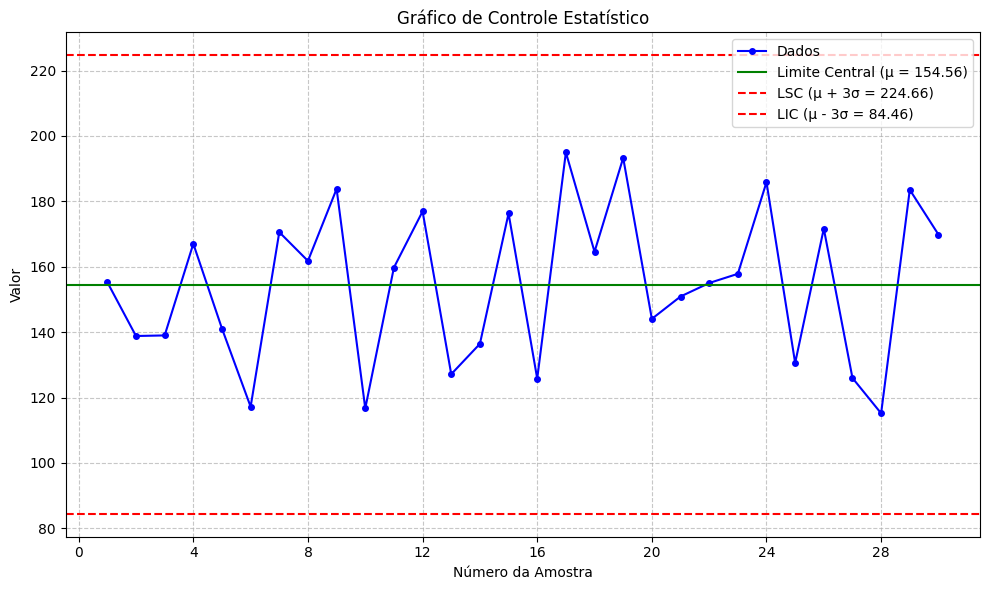

In [24]:
if __name__ == "__main__":
    main()